In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('family_data.csv')

In [3]:
df.head(5)

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,52,38,12,82,33,75,64,76,10,28,4
1,1,26,4,82,5,11,47,38,6,66,61,4
2,2,100,54,25,12,27,82,10,89,80,33,3
3,3,2,95,1,96,32,6,40,31,9,59,2
4,4,53,1,47,93,26,3,46,16,42,39,4


### preference cost

In [4]:
def pref_cost(df):
    df_cost=df.copy()
    df_cost['wildcard_choice'] = 0
    for i in range(len(df_cost)):
        n = df_cost.iloc[i,11]
        df_cost.iloc[i,1]=0          #ch0
        df_cost.iloc[i,2]=50          #ch1
        df_cost.iloc[i,3]=50+(9*n)          #ch2
        df_cost.iloc[i,4]=100+(9*n)          #ch3
        df_cost.iloc[i,5]=200+(9*n)          #ch4
        df_cost.iloc[i,6]=200+(18*n)          #ch5
        df_cost.iloc[i,7]=300+(18*n)          #ch6
        df_cost.iloc[i,8]=300+(36*n)          #ch7
        df_cost.iloc[i,9]=400+(36*n)          #ch8
        df_cost.iloc[i,10]=500+(36*n)+(199*n)          #ch9
        df_cost.iloc[i,12]=500+(36*n)+(398*n)          #ch10-wildcard
    return df_cost.drop(columns='n_people')

In [5]:
df_cost=pref_cost(df)
df_cost.head(10)

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,wildcard_choice
0,0,0,50,86,136,236,272,372,444,544,1440,2236
1,1,0,50,86,136,236,272,372,444,544,1440,2236
2,2,0,50,77,127,227,254,354,408,508,1205,1802
3,3,0,50,68,118,218,236,336,372,472,970,1368
4,4,0,50,86,136,236,272,372,444,544,1440,2236
5,5,0,50,86,136,236,272,372,444,544,1440,2236
6,6,0,50,68,118,218,236,336,372,472,970,1368
7,7,0,50,95,145,245,290,390,480,580,1675,2670
8,8,0,50,86,136,236,272,372,444,544,1440,2236
9,9,0,50,113,163,263,326,426,552,652,2145,3538


In [6]:
sample = pd.read_csv('sample_submission.csv')

In [7]:
import random
n = 100 # no of days
days = list(range(n,0,-1))
occu_df = pd.DataFrame(days)
occu_df.columns=['days']
occupancy = [random.randint(125,301) for x in range(100)]
occu_df['occupancy']=occupancy

In [8]:
occu_df.head(2)

,days,occupancy
0,100,298
1,99,232


### Accounting Penalty

In [14]:
def acct_pen(df):
    cost=0
    prev_occup=int(occu_df[occu_df.days==100]['occupancy']) #because Nd(100)==Nd(101)
    acct_cost=0
    arr=[]
    for index, row in df.iterrows():
        o = row['occupancy']
        #print(o, '-', prev_occup)
        power = 0.5 + (abs(o - prev_occup)/50)
        acct_cost += ((o - 125)/400)*o**power
        prev_occup = o
        arr.append(prev_occup)
    return acct_cost
        

In [15]:
acct_cost=acct_pen(occu_df)

In [16]:
acct_cost

137458925.79219526

In [12]:
df[['family_id','choice_0']].groupby('choice_0')['family_id'].count().reset_index()['family_id'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a4ab3c8>]],
      dtype=object)

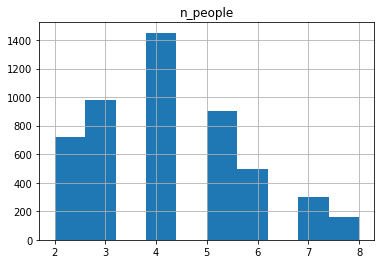

In [13]:
df[['n_people']].hist()

 Higher number of people in the family, higher cost to move them

There should be "moving weight" based on the size of the family